Figure 28.2
ADF Statistic: -2.238380
p-value: 0.192612
The time series is not stationary


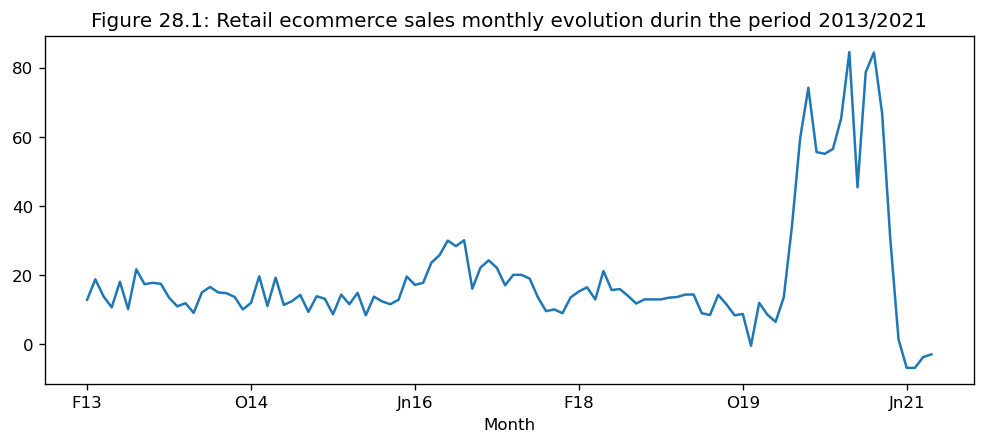

In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
from numpy import log


t0_df = pd.read_excel('t0.xlsx')
t0_df.columns=['Month','Retail sales evolution']
t0_df=t0_df.loc[:,['Month','Retail sales evolution']]
t0_df.index=t0_df['Month']

t0_df=t0_df['Retail sales evolution']
t0_df.head()

fig, axes = plt.subplots(nrows=1, ncols=1, dpi=120, figsize=(9,4))
fig.tight_layout(pad = 3.0)

 
#Plot Federal Funds against Time
t0_df.plot(title = 'Figure 28.1: Retail ecommerce sales monthly evolution durin the period 2013/2021')

#checking stationarity
result = adfuller(t0_df.dropna())
print("Figure 28.2")
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
alpha=result[1]
if alpha <0.05:
    print("The time serie is stationary")
else :
    print("The time series is not stationary")
    


Figure 29 : Original series and 1st differencing autocorrelation


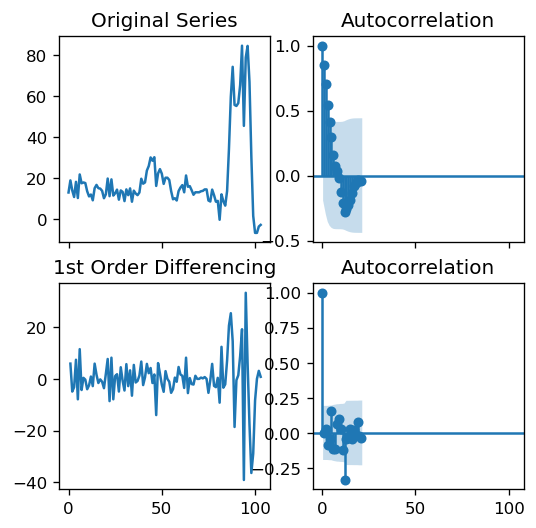

In [16]:
import numpy as np, pandas as pd
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt
plt.rcParams.update({'figure.figsize':(5,5), 'figure.dpi':120})

# Import data
t0_df=pd.read_excel("t0.xlsx")
t0_df = pd.read_excel('t0.xlsx')
t0_df.columns=['Month','Retail sales evolution']
t0_df=t0_df.loc[:,['Month','Retail sales evolution']]
t0_df=t0_df["Retail sales evolution"].astype("float64")

# Original Series
print("Figure 29 : Original series and 1st differencing autocorrelation")
fig, axes = plt.subplots(2, 2, sharex=True)
axes[0,0].plot(t0_df); axes[0,0].set_title('Original Series')
plot_acf(t0_df.dropna(), ax=axes[0, 1])

# 1st Differencing
axes[1, 0].plot(t0_df.diff()); axes[1, 0].set_title('1st Order Differencing')
plot_acf(t0_df.diff().dropna(), ax=axes[1, 1])
plt.show()


Figure 30 :1st differencing partial autocorrelation


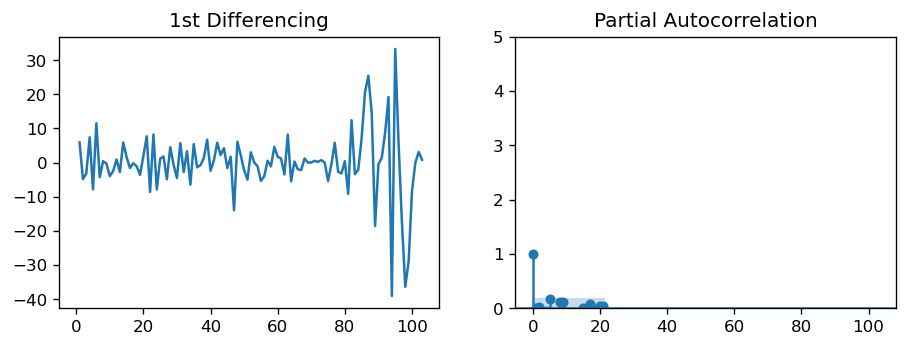

In [17]:
# PACF plot of 1st differenced series
import numpy as np, pandas as pd
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt
plt.rcParams.update({'figure.figsize':(9,3), 'figure.dpi':120})

# Import data
t0_df=pd.read_excel("t0.xlsx")
t0_df = pd.read_excel('t0.xlsx')
t0_df.columns=['Month','Retail sales evolution']
t0_df=t0_df.loc[:,['Month','Retail sales evolution']]
t0_df=t0_df["Retail sales evolution"].astype("float64")

print("Figure 30 :1st differencing partial autocorrelation")
fig, axes = plt.subplots(1, 2, sharex=True)
axes[0].plot(t0_df.diff()); axes[0].set_title('1st Differencing')
axes[1].set(ylim=(0,5))
plot_pacf(t0_df.diff().dropna(), ax=axes[1])

plt.show()

In [18]:
from statsmodels.tsa.arima_model import ARIMA

# 1,1,2 ARIMA Model
print("Figure 31: ARIMA Model results(p,d and q)")
model = ARIMA(t0_df, order=(1,1,1))
model_fit = model.fit(disp=0)
print(model_fit.summary())

Figure 31: ARIMA Model results(p,d and q)
                                ARIMA Model Results                                 
Dep. Variable:     D.Retail sales evolution   No. Observations:                  103
Model:                       ARIMA(1, 1, 1)   Log Likelihood                -377.198
Method:                             css-mle   S.D. of innovations              9.423
Date:                      Tue, 04 Jan 2022   AIC                            762.396
Time:                              06:03:10   BIC                            772.935
Sample:                                   1   HQIC                           766.665
                                                                                    
                                     coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const                             -0.1539      0.921     -0.167      0.867      

C:\Users\21269\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
C:\Users\21269\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.AR

Figure 32: Residual errors


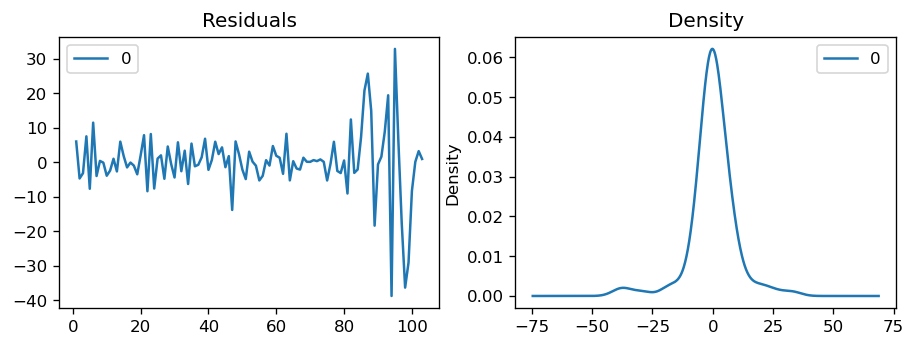

In [19]:
plt.rcParams.update({'figure.figsize':(9,3), 'figure.dpi':120})

# Plot residual errors
residuals = pd.DataFrame(model_fit.resid)
print("Figure 32: Residual errors")
fig, ax = plt.subplots(1,2)
residuals.plot(title="Residuals", ax=ax[0])
residuals.plot(kind='kde', title='Density', ax=ax[1])
plt.show()

Figure 33: Fitting the model of Retail ecommerce sales monthly evolution


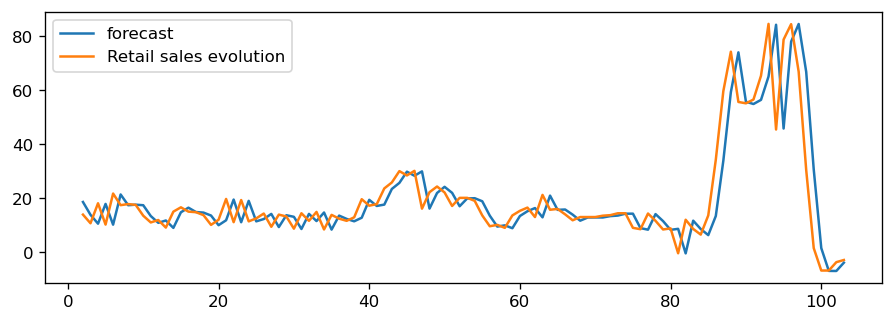

In [20]:
# Actual vs Fitted
print("Figure 33: Fitting the model of Retail ecommerce sales monthly evolution")
model_fit.plot_predict(dynamic=False)
plt.show()

C:\Users\21269\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
C:\Users\21269\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.AR

 Figure 34: Training and testing Retail ecommerce sales forcasting model


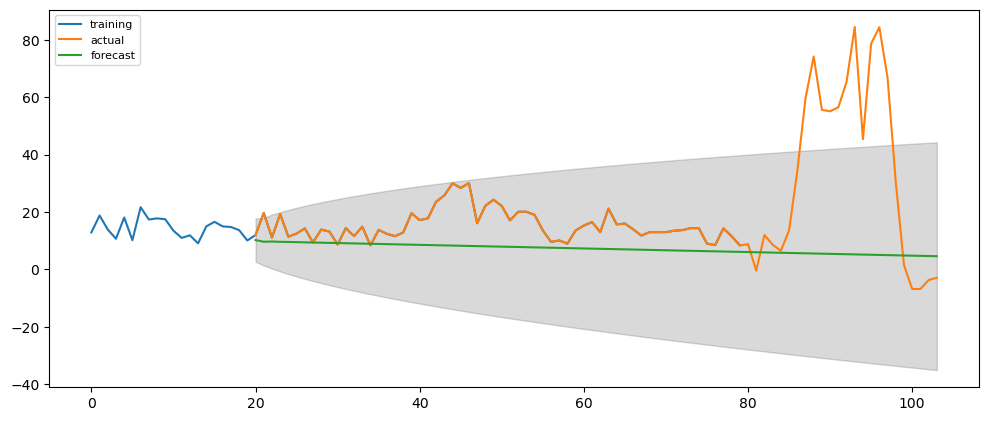

In [21]:

from statsmodels.tsa.stattools import acf


# Create Training and Test
train = t0_df[:80]
test = t0_df[20:]

# Build Model
 
model = ARIMA(train, order=(1, 1, 1))  
fitted = model.fit(disp=-1)  


# Forecast
fc, se, conf = fitted.forecast(84, alpha=0.05)  # 95% conf

#make pandas series
fc_series = pd.Series(fc, index=test.index)
lower_series = pd.Series(conf[:, 0], index=test.index)
upper_series = pd.Series(conf[:, 1], index=test.index)

# Plot
print(" Figure 34: Training and testing Retail ecommerce sales forcasting model")
plt.figure(figsize=(12,5), dpi=100)
plt.plot(train, label='training')
plt.plot(test, label='actual')
plt.plot(fc_series, label='forecast')
plt.fill_between(lower_series.index, lower_series, upper_series, 
                 color='k', alpha=.15)
plt.title('')
plt.legend(loc='upper left', fontsize=8)
plt.show()

C:\Users\21269\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


Figure 35: Forcasting Retail ecommerce sales monthly evolution for the coming 24 months


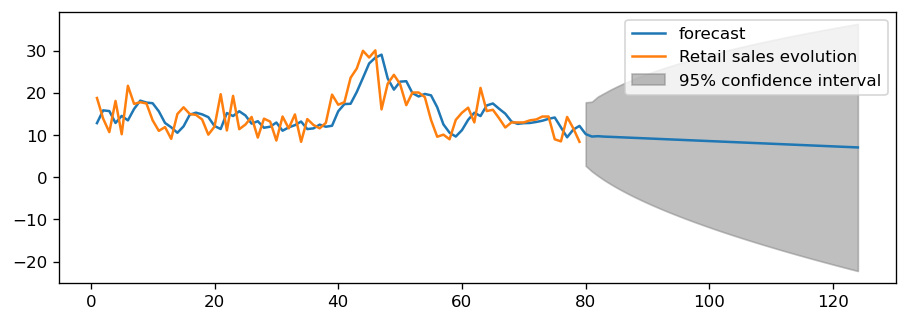

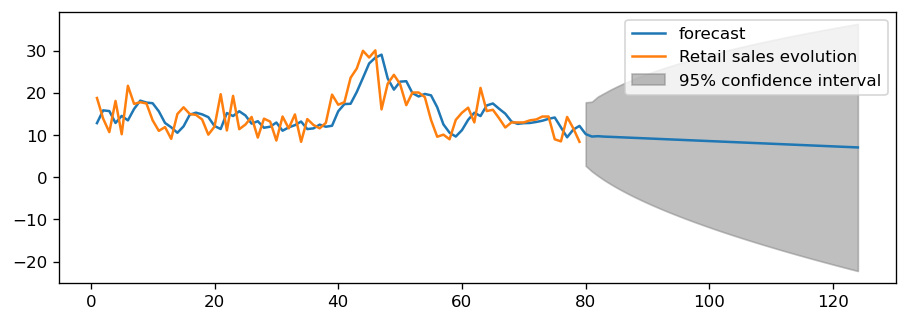

In [22]:
model = ARIMA(train, order=(1, 1, 1))  
fitted = model.fit(disp=-1) 
#predic the next upcoming 20 months
print("Figure 35: Forcasting Retail ecommerce sales monthly evolution for the coming 24 months")
fitted.plot_predict(1,124)